In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

df = pd.read_csv(r'c:\\Users\szere\OneDrive\Pulpit\Master topics\Startup-Success-Prediction-master\d3\data\startup.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1154 non-null   int64  
 1   state_code                1154 non-null   object 
 2   latitude                  1154 non-null   float64
 3   longitude                 1154 non-null   float64
 4   zip_code                  1154 non-null   object 
 5   id                        1154 non-null   object 
 6   city                      1154 non-null   object 
 7   Unnamed: 6                536 non-null    object 
 8   name                      1154 non-null   object 
 9   status                    1154 non-null   object 
 10  labels                    1154 non-null   int64  
 11  founded_at                1154 non-null   object 
 12  closed_at                 419 non-null    object 
 13  first_funding_at          1154 non-null   object 
 14  last_fun

In [26]:
# Data cleaning - unnecessary/incorrect data and nan values

#1) remove unnecessary columns + adding binary target column

df['success'] = df.status.apply(lambda x: 1 if x == "acquired" else 0)
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 23, 29, 40 ]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    1154 non-null   float64
 1   age_last_funding_year     1154 non-null   float64
 2   age_first_milestone_year  959 non-null    float64
 3   age_last_milestone_year   959 non-null    float64
 4   relationships             1154 non-null   int64  
 5   funding_rounds            1154 non-null   int64  
 6   funding_total_usd         1154 non-null   int64  
 7   milestones                1154 non-null   int64  
 8   is_CA                     1154 non-null   int64  
 9   is_NY                     1154 non-null   int64  
 10  is_MA                     1154 non-null   int64  
 11  is_TX                     1154 non-null   int64  
 12  is_otherstate             1154 non-null   int64  
 13  is_software               1154 non-null   int64  
 14  is_web  

In [27]:
#2) drop rows with negative values

indexNames = df[ (df['age_first_funding_year'] < 0) ].index
df.drop(indexNames , inplace=True)

indexNames2 = df[ (df['age_last_funding_year'] < 0) ].index
df.drop(indexNames2 , inplace=True)

indexNames3 = df[ (df['age_first_milestone_year'] < 0) ].index
df.drop(indexNames3 , inplace=True)

indexNames4 = df[ (df['age_last_milestone_year'] < 0) ].index
df.drop(indexNames4 , inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1153
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    1044 non-null   float64
 1   age_last_funding_year     1044 non-null   float64
 2   age_first_milestone_year  863 non-null    float64
 3   age_last_milestone_year   863 non-null    float64
 4   relationships             1044 non-null   int64  
 5   funding_rounds            1044 non-null   int64  
 6   funding_total_usd         1044 non-null   int64  
 7   milestones                1044 non-null   int64  
 8   is_CA                     1044 non-null   int64  
 9   is_NY                     1044 non-null   int64  
 10  is_MA                     1044 non-null   int64  
 11  is_TX                     1044 non-null   int64  
 12  is_otherstate             1044 non-null   int64  
 13  is_software               1044 non-null   int64  
 14  is_web  

In [28]:
#3) replace nan with 0 values

print(df.isnull().sum())

df['age_first_milestone_year'] = df['age_first_milestone_year'].replace(np.nan, 0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].replace(np.nan, 0)

print("Modified  Dataframe" , df, sep='\n')
df.info()
df.to_csv( r'c:\\Users\szere\OneDrive\Pulpit\Master topics\Startup-Success-Prediction-master\d3\data\startup2.csv', index=False,
           header=True )

age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    181
age_last_milestone_year     181
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
success 

       age_first_funding_year  age_last_funding_year  \
count             1044.000000            1044.000000   
mean                 2.435398               4.119230   
std                  2.510954               2.944048   
min                  0.000000               0.000000   
25%                  0.668500               1.914375   
50%                  1.671200               3.710950   
75%                  3.713025               5.693150   
max                 21.895900              21.895900   

       age_first_milestone_year  age_last_milestone_year  relationships  \
count               1044.000000              1044.000000    1044.000000   
mean                   2.797452                 4.109578       7.583333   
std                    2.872823                 3.417387       7.022068   
min                    0.000000                 0.000000       0.000000   
25%                    0.268525                 1.000000       3.000000   
50%                    2.021950              

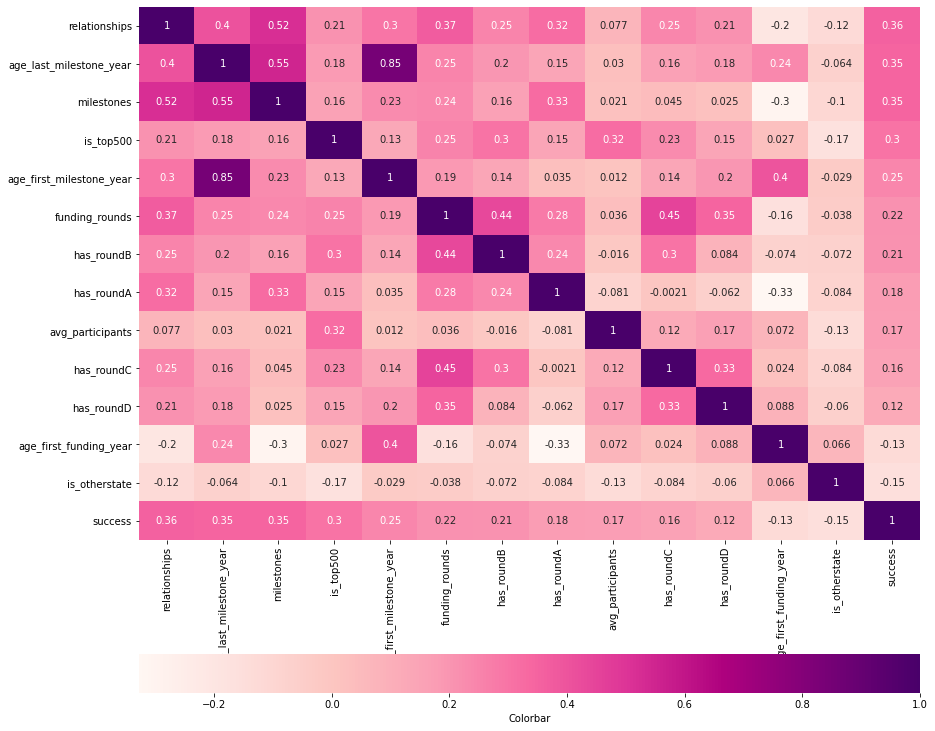

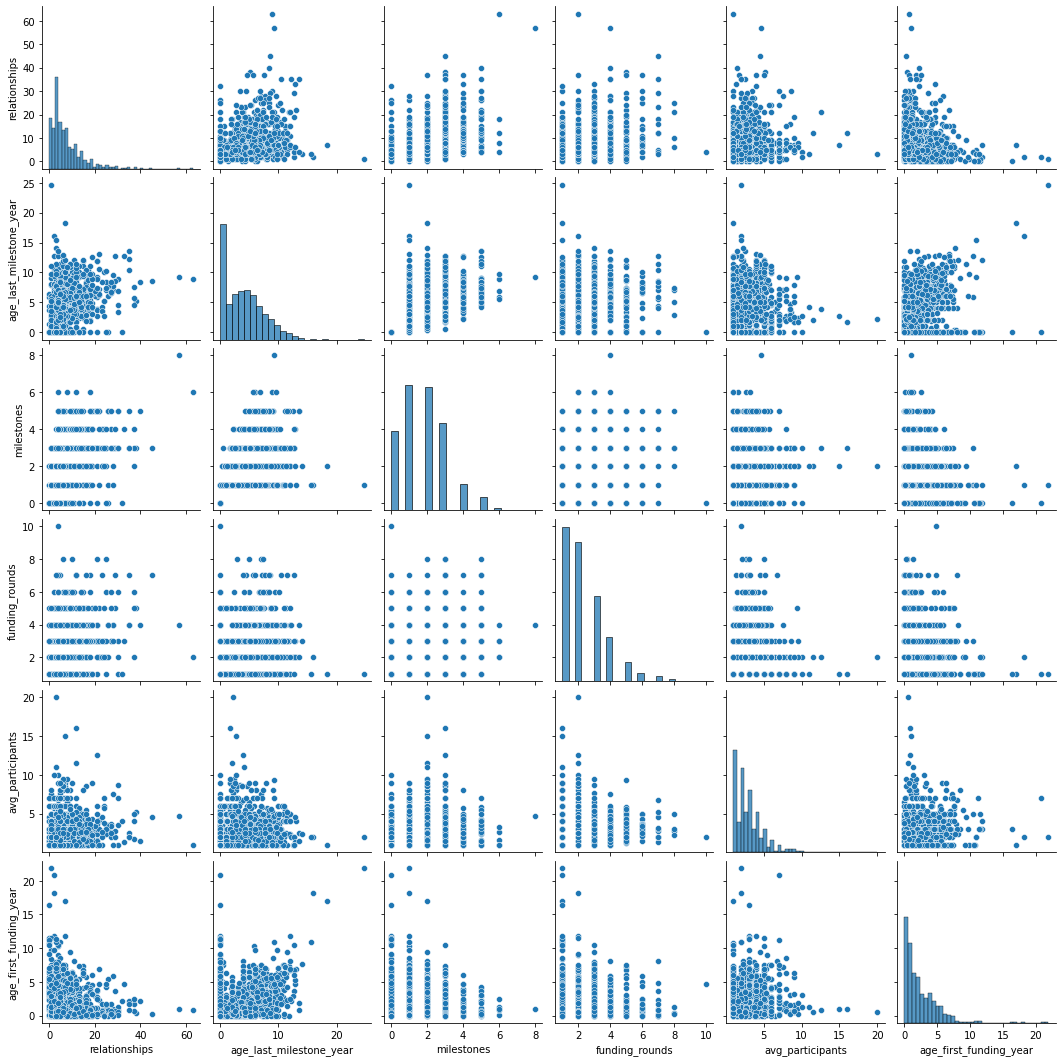

<ipython-input-29-f154fce720ac>:26: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  num_var.hist(ax=ax, bins=10, rwidth=0.85)


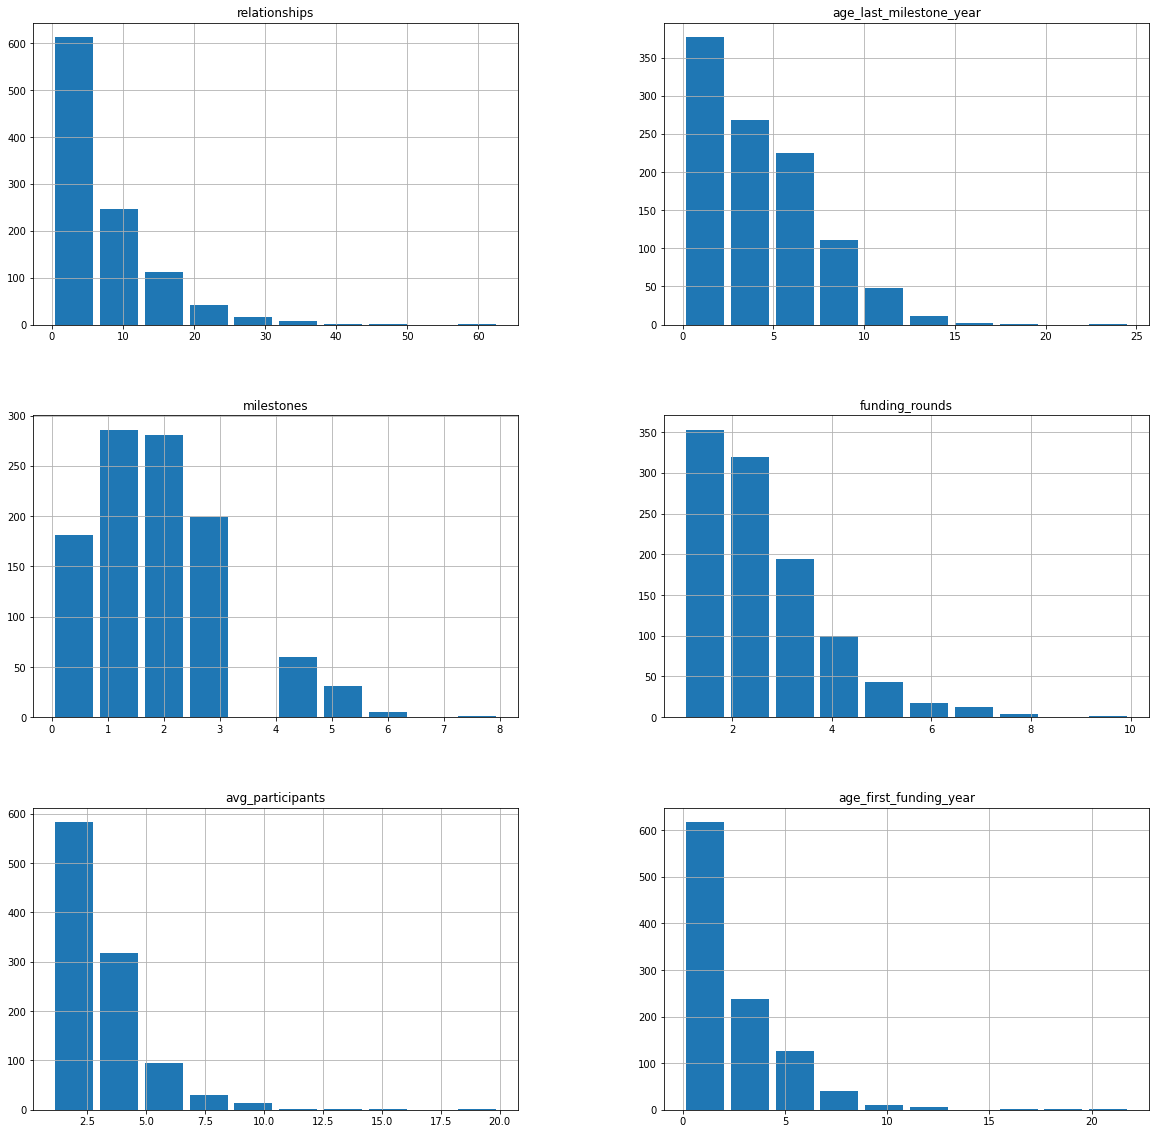

In [29]:
#Descriptive statistics and visualisations

pd.set_option("display.max.columns", None)
print (df. describe(include='all'))

#Find correlations between target and other variables

df_corr_pd = df.corr()
print(df_corr_pd['success'].sort_values(ascending=False))
corr_variables = df[['relationships', 'age_last_milestone_year', 'milestones', 'is_top500', 'age_first_milestone_year', 'funding_rounds', 'has_roundB', 'has_roundA',
                   'avg_participants', 'has_roundC', 'has_roundD', 'age_first_funding_year', 'is_otherstate', 'success']]

plt.figure(figsize = (14,14))
sn.heatmap(corr_variables.corr(), annot = True, cmap = plt.cm.RdPu, cbar_kws={'label': 'Colorbar', 'orientation': 'horizontal'})
plt.show()

#Numerical variables

num_var = df[['relationships', 'age_last_milestone_year', 'milestones', 'funding_rounds',
                   'avg_participants', 'age_first_funding_year']]
sn.pairplot(num_var)
plt.show()

fig = plt.figure(figsize = (20,20))
ax = fig.gca()
num_var.hist(ax=ax, bins=10, rwidth=0.85)
plt.show()

df = df.drop(df.columns[[2]], axis=1)

In [30]:
# Logistic Regression

%matplotlib inline

success_mod = logit("success ~ relationships + age_last_milestone_year + milestones + is_top500 + funding_rounds + has_roundB + has_roundA"
                   "+ avg_participants + has_roundC + has_roundD + age_first_funding_year", df ).fit()

print(success_mod.summary())

#How good is the prediction?
success_mod.pred_table()

#Marginal effect
mfx = success_mod.get_margeff()
print(mfx.summary())


Optimization terminated successfully.
         Current function value: 0.485309
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 1044
Model:                          Logit   Df Residuals:                     1032
Method:                           MLE   Df Model:                           11
Date:                Sat, 03 Apr 2021   Pseudo R-squ.:                  0.2444
Time:                        22:42:37   Log-Likelihood:                -506.66
converged:                       True   LL-Null:                       -670.59
Covariance Type:            nonrobust   LLR p-value:                 1.170e-63
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.8084      0.274     -6.590      0.000      -2.346   

In [31]:
#Divide df into train (67%)  and test (33%) subsets

X = df [['relationships', 'age_last_milestone_year', 'milestones', 'is_top500', 'funding_rounds', 'has_roundB', 'has_roundA',
                   'avg_participants', 'has_roundC', 'has_roundD', 'age_first_funding_year']]
y = df[['success']]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1044, 11) (1044, 1)
(699, 11) (345, 11) (699, 1) (345, 1)


Accuracy: 0.7681159420289855
Precision: 0.7950819672131147
Sensitivity: 0.8660714285714286
roc_auc_score for Log Reg:  0.7930194805194805


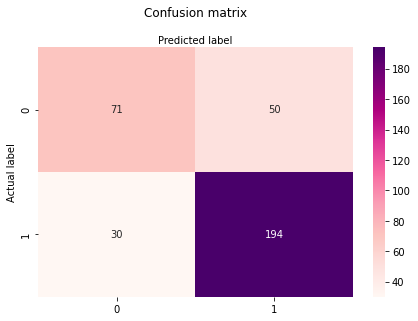

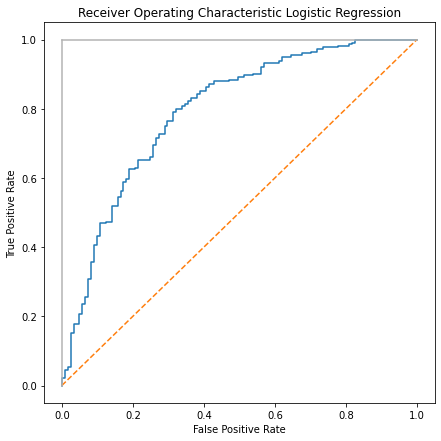

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train.values.ravel())
y_pred=logreg.predict(X_test)


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Sensitivity:",metrics.recall_score(y_test, y_pred))

y_score = logreg.predict_proba(X_test)[::,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score)
print('roc_auc_score for Log Reg: ', roc_auc_score(y_test, y_score))

# Plot ROC
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
#CART algorithm
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtc = dtc.fit(X_train,y_train)
y2_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))


Accuracy: 0.7768115942028986


Index(['relationships', 'age_last_milestone_year', 'milestones', 'is_top500',
       'age_first_milestone_year', 'funding_rounds', 'has_roundB',
       'has_roundA', 'avg_participants', 'has_roundC', 'has_roundD',
       'age_first_funding_year', 'is_otherstate', 'success'],
      dtype='object')
roc_auc_score for Decision Tree:  0.7804198642266825


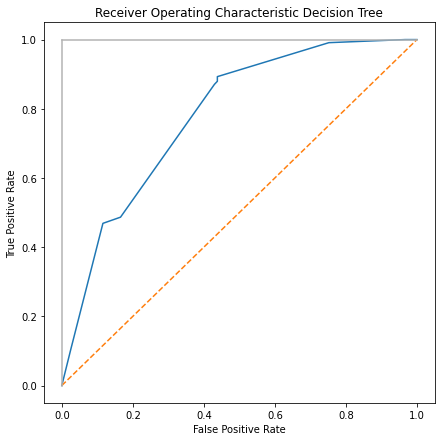

In [34]:
#Visualise the tree
print(corr_variables.columns)
feature_names = corr_variables.columns[:12]
target_names = corr_variables.columns[13]

y2_score = dtc.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y2_score)
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y2_score))

# Plot ROC
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic Decision Tree')
plt.plot(false_positive_rate2,true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

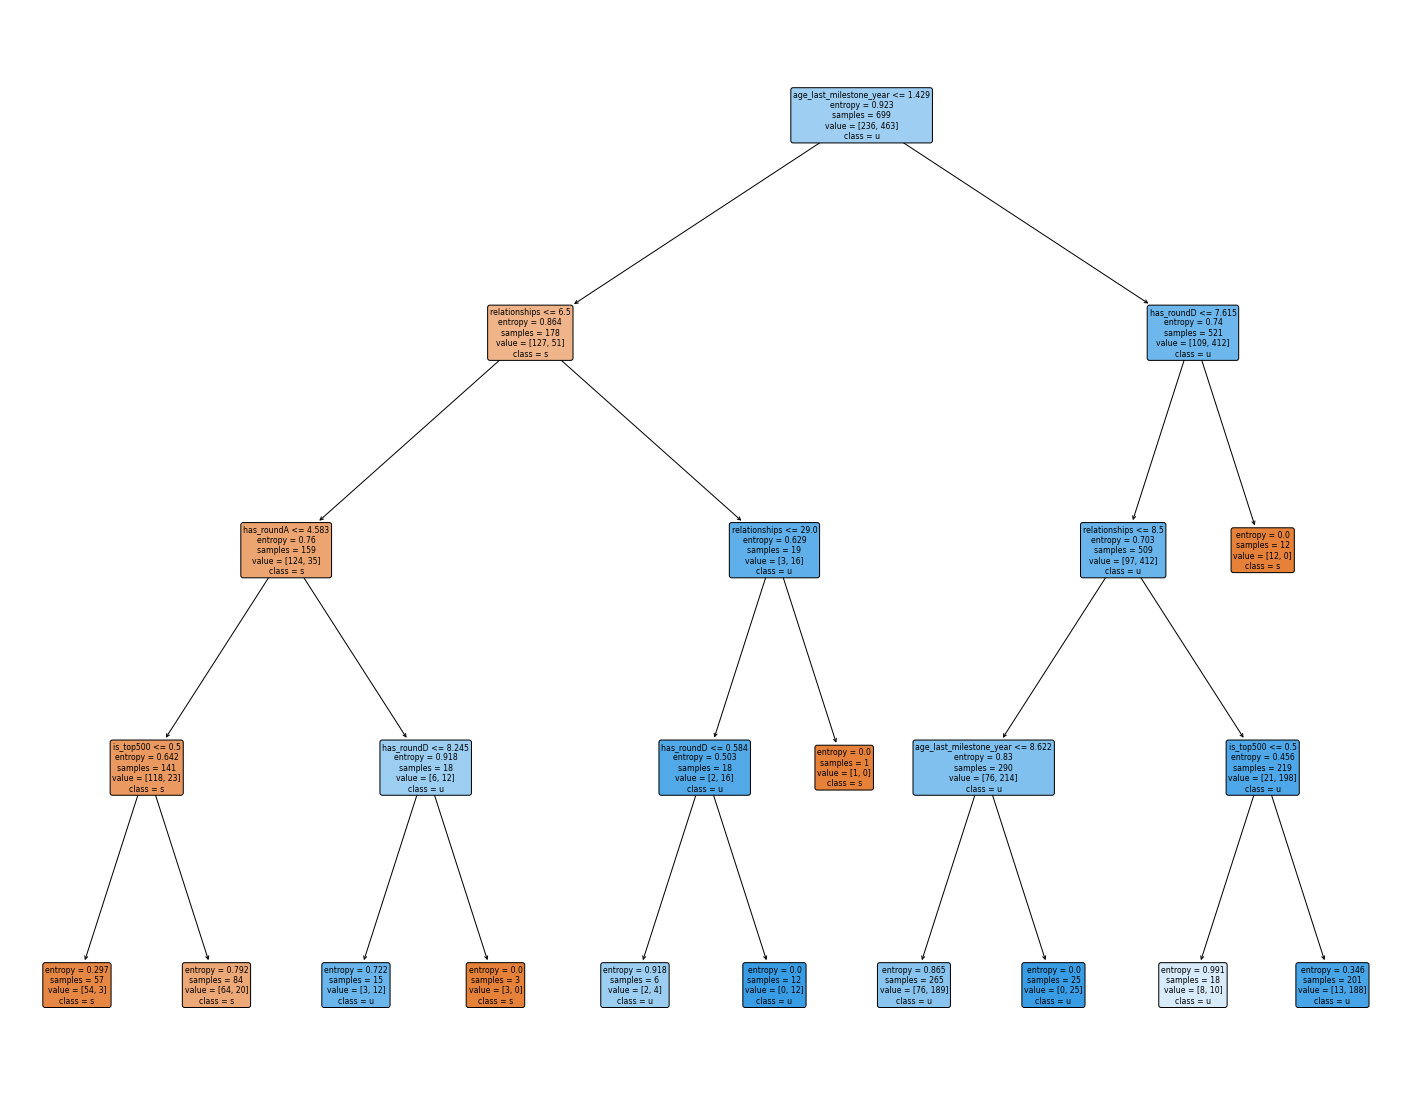

In [35]:
#Random forest with the best features
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc,
          feature_names = feature_names,
          class_names = target_names,
          filled = True,
          rounded = True)

plt.savefig('tree_visualization.png')

<ipython-input-36-679216681de6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Accuracy: 0.7652173913043478
roc_auc_score for Random Forest:  0.7991440377804013


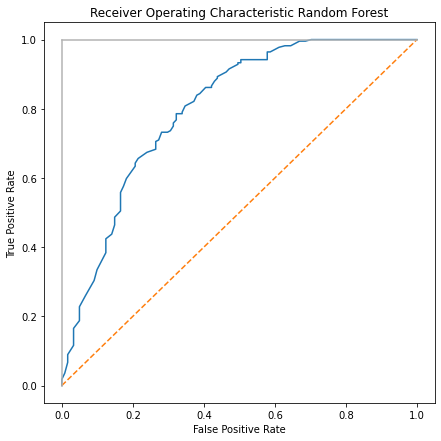

In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier, 100 decision trees
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
y3_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y3_pred))

#ROC

y3_score = clf.predict_proba(X_test)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y3_score)
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y3_score))

# Plot ROC
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic Random Forest')
plt.plot(false_positive_rate3,true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

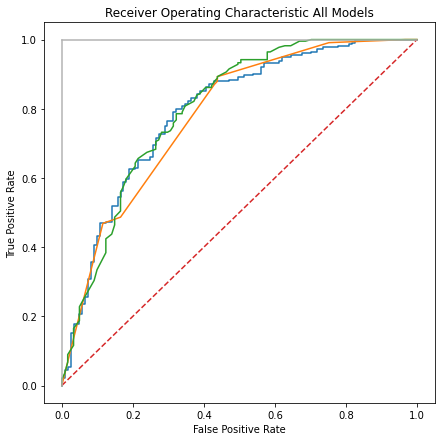

In [37]:
# Plot ROC all models
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic All Models')
plt.plot(false_positive_rate1, true_positive_rate1, false_positive_rate2,true_positive_rate2, false_positive_rate3,true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs (clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\szere\pycharmprojects\pythonproject2\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\szere\pycharmprojects\pythonproject2\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\szere\pycharmprojects\pythonproject2\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_t

[0, 3, 5, 6, 9]
